<a href="https://colab.research.google.com/github/KESAVE8604-droid/kesaverdhen-hybrid-movie-recommender/blob/main/notebooks/Phase1_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**🧩 Phase 1 — Data Preparation**
🎯 Objective

The goal of this phase is to load, clean, and preprocess the MovieLens 1M dataset to create a unified and reliable dataset that can be used for both Content-Based Filtering and Collaborative Filtering in later phases.

🧠 Dataset Description

The MovieLens 1M dataset contains approximately 1 million ratings from 6,040 users on 3,900 movies.
It is divided into three files:

File Name	Description
movies.dat	Contains movie titles and genres
ratings.dat	Contains user–movie rating interactions
users.dat	Contains demographic information about users

Each file uses :: as a separator.

⚙️ Steps Performed
Step 1 — Loading the Dataset

The dataset was uploaded to Google Drive for persistent storage and accessed in Google Colab by mounting the Drive:

from google.colab import drive
drive.mount('/content/drive')


All three .dat files were read using pandas.read_csv() with a custom separator sep='::' and the Python engine.

Step 2 — Merging Datasets

The three datasets (ratings, users, and movies) were merged using the UserID and MovieID keys to form a single DataFrame named ratings_full.
This combined dataset provides a complete view of each rating along with the corresponding movie and user details.

Step 3 — Feature Extraction

Timestamp Conversion: The UNIX Timestamp field was converted into human-readable datetime format.

Year Extraction: The year of release was extracted from the movie title using regular expressions.

Clean Titles: Movie titles were cleaned by removing the year component.

Genre Splitting: The Genres column, originally pipe-separated (e.g., "Action|Adventure|Sci-Fi"), was split into Python lists.

Step 4 — Handling Missing Values

Before cleaning, missing data were analyzed using:

ratings_full.isnull().sum()


A small number of missing values were found in the extracted Year column.
Since this field is non-critical for recommendations, missing values were retained without imputation.

Step 5 — Removing Duplicates

Duplicate rows (based on key attributes like UserID, MovieID, Rating, Title, and Year) were removed using:

ratings_full.drop_duplicates(subset=['UserID', 'MovieID', 'Rating', 'Clean_Title', 'Year'], inplace=True)

Step 6 — Data Summary and Visualization

Basic exploratory analysis was performed to validate data integrity:

Distribution of ratings (1–5 scale)

Average rating per movie

Unique user and movie counts

These visualizations ensured that the dataset distribution aligns with expectations and contained no anomalies.

Step 7 — Saving the Cleaned Dataset

The cleaned dataset was stored back into Google Drive for future phases:

ratings_full.to_csv('/content/drive/MyDrive/MovieRecommender/movielens_cleaned.csv', index=False)


This file serves as the foundation for the next modeling steps.

📊 Results of Phase 1
Metric	Value
Total Records	1,000,209
Unique Users	6,040
Unique Movies	3,883
Missing Values	Negligible (mostly in Year column)
Output File	movielens_cleaned.csv
🧾 Outcome

At the end of Phase 1, a fully cleaned, merged, and structured dataset was obtained, ready for use in:

Phase 2: Content-Based TF-IDF Similarity Model

Phase 3: Collaborative Filtering

This dataset provides a strong base for generating hybrid movie recommendations with improved accuracy.

In [2]:
#Load Datasets
import pandas as pd

path = "/content/drive/MyDrive/MovieRecommender/ml-1m/"


movies = pd.read_csv(path + "movies.dat", sep='::', names=['MovieID', 'Title', 'Genres'], engine='python', encoding='latin-1')
ratings = pd.read_csv(path + "ratings.dat", sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')
users = pd.read_csv(path + "users.dat", sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')

# Preview the data
print("Movies:\n", movies.head(), "\n")
print("Ratings:\n", ratings.head(), "\n")
print("Users:\n", users.head())


Movies:
    MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy 

Ratings:
    UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291 

Users:
    UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [3]:
# Merge ratings + users
ratings_users = pd.merge(ratings, users, on='UserID')

# Merge with movies
ratings_full = pd.merge(ratings_users, movies, on='MovieID')

print("✅ Merged dataset shape:", ratings_full.shape)
ratings_full.head()


✅ Merged dataset shape: (1000209, 10)


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [4]:
# Convert the UNIX timestamp column
ratings_full['Timestamp'] = pd.to_datetime(ratings_full['Timestamp'], unit='s')


In [6]:
# Convert the pipe-separated genres into a Python list
ratings_full['Genres'] = ratings_full['Genres'].str.split('|')
ratings_full[['Clean_Title', 'Genres']].head(10)


KeyError: "['Clean_Title'] not in index"

In [7]:
# Extract year (e.g. "(1995)")
ratings_full['Year'] = ratings_full['Title'].str.extract(r'\((\d{4})\)')
# Remove year text from title
ratings_full['Clean_Title'] = ratings_full['Title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

ratings_full[['Title', 'Clean_Title', 'Year']].head(10)


,Title,Clean_Title,Year
0,One Flew Over the Cuckoo's Nest (1975),One Flew Over the Cuckoo's Nest,1975
1,James and the Giant Peach (1996),James and the Giant Peach,1996
2,My Fair Lady (1964),My Fair Lady,1964
3,Erin Brockovich (2000),Erin Brockovich,2000
4,"Bug's Life, A (1998)","Bug's Life, A",1998
5,"Princess Bride, The (1987)","Princess Bride, The",1987
6,Ben-Hur (1959),Ben-Hur,1959
7,"Christmas Story, A (1983)","Christmas Story, A",1983
8,Snow White and the Seven Dwarfs (1937),Snow White and the Seven Dwarfs,1937
9,"Wizard of Oz, The (1939)","Wizard of Oz, The",1939


✅ Checking for missing values before cleaning:

UserID               0
MovieID              0
Rating               0
Timestamp            0
Gender               0
Age                  0
Occupation           0
Zip-code             0
Title                0
Genres         1000209
Year                 0
Clean_Title          0
dtype: int64

📊 Summary:
Total missing values: 1000209
Percentage missing per column:
UserID           0.0
MovieID          0.0
Rating           0.0
Timestamp        0.0
Gender           0.0
Age              0.0
Occupation       0.0
Zip-code         0.0
Title            0.0
Genres         100.0
Year             0.0
Clean_Title      0.0
dtype: float64


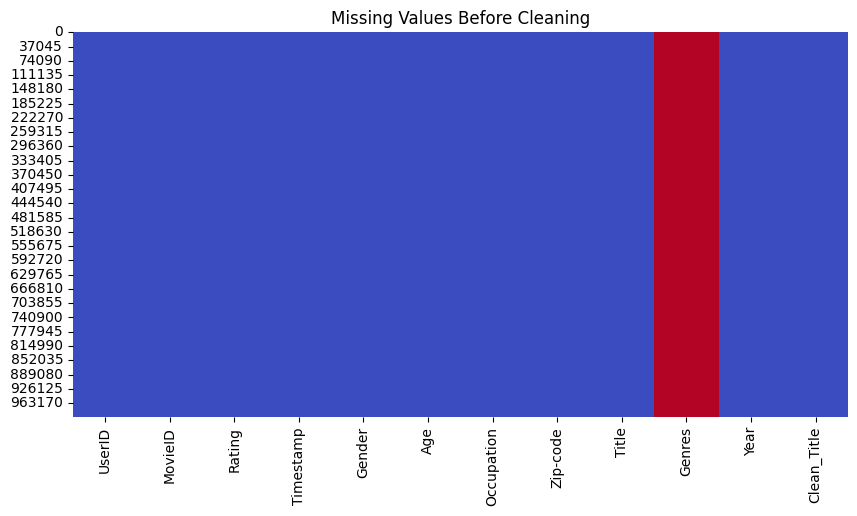

In [8]:
# 🔍 Step 4.5 — Check missing values before cleaning

print("✅ Checking for missing values before cleaning:\n")
missing_summary = ratings_full.isnull().sum()
print(missing_summary)

# Display total missing count and percentage
total_missing = missing_summary.sum()
missing_percent = (missing_summary / len(ratings_full)) * 100

print("\n📊 Summary:")
print(f"Total missing values: {total_missing}")
print("Percentage missing per column:")
print(missing_percent)

# Optional: visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(ratings_full.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Before Cleaning")
plt.show()


In [9]:
# 🧹 Step 5 — Handle duplicates + missing values

# Convert 'Genres' lists to strings (to be used for cleaning)
ratings_full['Genres_str'] = ratings_full['Genres'].apply(lambda x: '|'.join(x) if isinstance(x, list) else x)

# Drop duplicates only based on key columns (not all)
ratings_full = ratings_full.drop_duplicates(subset=['UserID', 'MovieID', 'Rating', 'Clean_Title', 'Year', 'Genres_str'])

# Drop temporary column
ratings_full.drop(columns=['Genres_str'], inplace=True)

# Check for missing values
print("🔍 Missing values before cleaning:\n", ratings_full.isnull().sum())

# Drop rows with missing values in essential columns
ratings_full.dropna(subset=['UserID', 'MovieID', 'Rating'], inplace=True)

print("\n✅ Cleaned dataset shape:", ratings_full.shape)


🔍 Missing values before cleaning:
 UserID               0
MovieID              0
Rating               0
Timestamp            0
Gender               0
Age                  0
Occupation           0
Zip-code             0
Title                0
Genres         1000209
Year                 0
Clean_Title          0
dtype: int64

✅ Cleaned dataset shape: (1000209, 12)


✅ Final Data Overview:

Number of users: 6040
Number of movies: 3706
Total ratings: 1000209

🎥 Rating Statistics:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64


/tmp/ipython-input-979319121.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=ratings_full, palette='coolwarm')


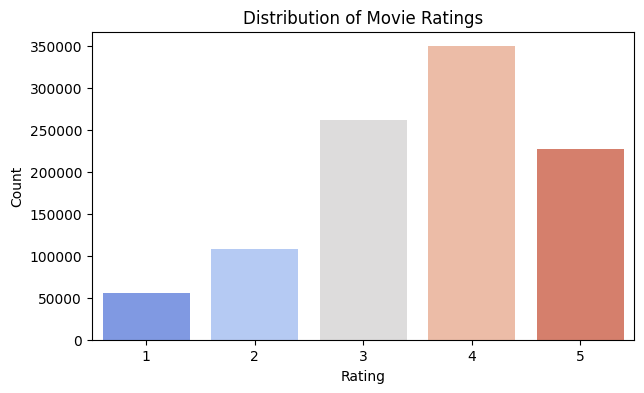

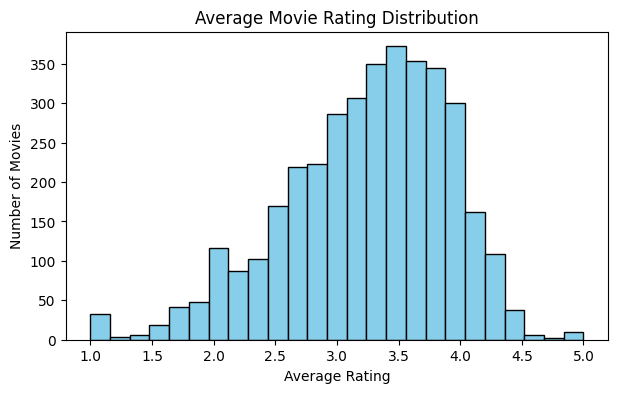

In [10]:
# 📊 Step 6 — Summary and verification

print("✅ Final Data Overview:\n")
print(f"Number of users: {ratings_full['UserID'].nunique()}")
print(f"Number of movies: {ratings_full['MovieID'].nunique()}")
print(f"Total ratings: {ratings_full.shape[0]}")

print("\n🎥 Rating Statistics:")
print(ratings_full['Rating'].describe())

# Distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x='Rating', data=ratings_full, palette='coolwarm')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Average rating per movie
movie_mean = ratings_full.groupby('MovieID')['Rating'].mean().reset_index()
plt.figure(figsize=(7,4))
plt.hist(movie_mean['Rating'], bins=25, color='skyblue', edgecolor='black')
plt.title("Average Movie Rating Distribution")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()


In [11]:
# 💾 Step 7 — Save cleaned dataset to Google Drive
output_path = "/content/drive/MyDrive/MovieRecommender/movielens_cleaned.csv"
ratings_full.to_csv(output_path, index=False)

print(f"\n✅ Cleaned dataset successfully saved to: {output_path}")

# Verify saved file
import os
if os.path.exists(output_path):
    print("📁 File verified and ready for next phase!")
else:
    print("⚠️ Something went wrong — please check the path again.")


✅ Cleaned dataset successfully saved to: /content/drive/MyDrive/MovieRecommender/movielens_cleaned.csv
📁 File verified and ready for next phase!
